# Titanic : Machine Learning from Disaster

** this is kaggle problem for practise

* The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

## DATA

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#import data
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

let's visualize our data

In [4]:
train_data.shape

(891, 12)

In [5]:
test_data.shape

(418, 11)

* we are missing a column in test data. That is our dependent variable

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Survived' column is our dependent variable and we have to prdeict.

In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


we can see some missing values in age

In [9]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have missing values in Age, Cabin and Embarked

In [10]:
train_data["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

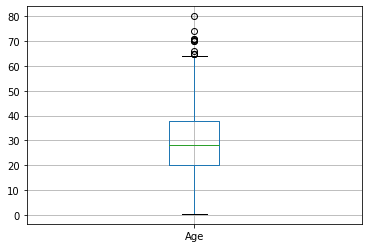

In [11]:
train_data.boxplot('Age')

we have some outliers in Age column

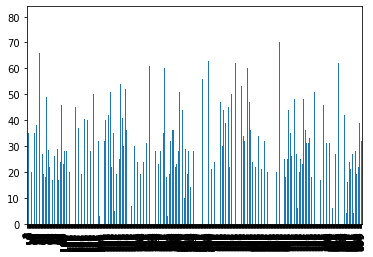

In [12]:
train_data["Age"].plot(kind="bar")

In [13]:
train_data["Age"].mean()

29.69911764705882

In [14]:
train_data["Age"].median()

28.0

In [15]:
train_data["Age"].mode()

0    24.0
dtype: float64

there is no much difference between mean, median and mode

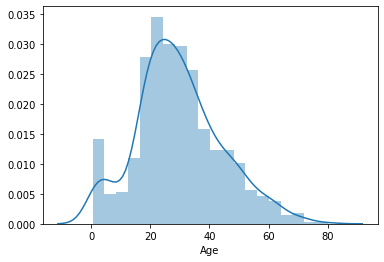

In [16]:
sns.distplot(train_data["Age"])

In [17]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)

In [18]:
train_data["Age"].isnull().sum()

0

In [19]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
train_data["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [21]:
891-687

204

we have only 204 values in Cabin

In [22]:
204/891

0.22895622895622897

just 23%

In [23]:
train_data["Cabin"].dtype

dtype('O')

In [24]:
train_data["Cabin"].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
C22 C26        3
              ..
C46            1
B71            1
E58            1
E34            1
B30            1
Name: Cabin, Length: 147, dtype: int64

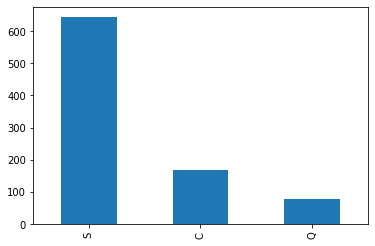

In [25]:
train_data["Embarked"].value_counts().plot(kind="bar")

we can replace missing values with S. 

In [26]:
train_data["Embarked"].fillna("S", inplace=True)

In [27]:
train_data["Embarked"].isna().sum()

0

In [28]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [29]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
test_data["Age"].fillna(test_data["Age"].median, inplace=True)

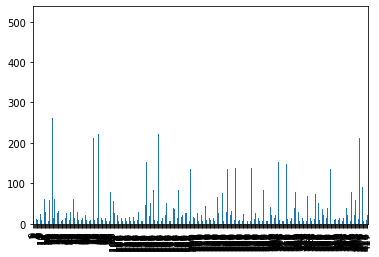

In [31]:
test_data["Fare"].plot(kind="bar")

In [32]:
test_data["Fare"].mean(), test_data["Fare"].median(), test_data["Fare"].mode()

(35.627188489208635,
 14.4542,
 0    7.75
 dtype: float64)

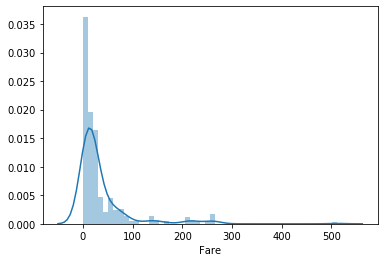

In [33]:
sns.distplot(test_data["Fare"])

In [34]:
test_data["Fare"].fillna(test_data["Fare"].median(),inplace=True)

In [35]:
train_data["Cabin"].fillna("Missing" ,inplace=True)

In [36]:
test_data["Cabin"].fillna("Missing" ,inplace=True)

In [37]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [38]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
categorical=[]
for i in train_data.columns:
    if train_data[i].dtype=='O':
        categorical.append(i)

In [41]:
categorical

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

these are categorical variables, we should convert them into numerical 

In [42]:
numerical=[]
for i in train_data.columns:
    if train_data[i].dtype!='O':
        numerical.append(i)

In [43]:
numerical

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

let's use pandas.api.types

In [44]:
for label,content in train_data.items():
    if pd.api.types.is_string_dtype(content):
        train_data[label]=content.astype("category").cat.as_ordered()
        train_data[label]=train_data[label].cat.codes


In [45]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int16  
 4   Sex          891 non-null    int8   
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int16  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int16  
 11  Embarked     891 non-null    int8   
dtypes: float64(2), int16(3), int64(5), int8(2)
memory usage: 55.8 KB


In [46]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,146,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,146,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,146,2


In [47]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    object 
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 36.0+ KB


In [48]:
test_data1=pd.read_csv("test.csv")

In [49]:
test_data_new=pd.DataFrame()

In [50]:
for label in test_data1.columns:
    test_data_new[label]=test_data1[label]

In [51]:
test_data_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [52]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Missing,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,Missing,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Missing,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,Missing,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,Missing,S


In [53]:
test_data_new.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [54]:
test_data_new["Age"].fillna(test_data_new["Age"].median(),inplace=True)

In [55]:
test_data_new["Cabin"].fillna("Missing",inplace=True)

In [56]:
test_data_new["Fare"].fillna(test_data_new["Fare"].median(),inplace=True)

In [57]:
test_data_new.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [58]:
for label,content in test_data_new.items():
    if pd.api.types.is_string_dtype(content):
        test_data_new[label]=content.astype('category').cat.as_ordered()
        test_data_new[label]=test_data_new[label].cat.codes

In [59]:
test_data_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2


In [60]:
X_train = train_data.drop(['Survived','Name','PassengerId'], axis=1)
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,22.0,1,0,523,7.2500,146,2
1,1,0,38.0,1,0,596,71.2833,81,0
2,3,0,26.0,0,0,669,7.9250,146,2
3,1,0,35.0,1,0,49,53.1000,55,2
4,3,1,35.0,0,0,472,8.0500,146,2


In [61]:
X_test = test_data_new.drop(['Name','PassengerId'], axis=1)
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,1,34.5,0,0,152,7.8292,76,1
1,3,0,47.0,1,0,221,7.0000,76,2
2,2,1,62.0,0,0,73,9.6875,76,1
3,3,1,27.0,0,0,147,8.6625,76,2
4,3,0,22.0,1,1,138,12.2875,76,2


In [62]:
y_train = train_data["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rf = RandomForestClassifier()

In [65]:
rf.fit(X_train, train_data["Survived"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
rf.score(X_train, y_train)

0.9977553310886644

### OMG! MODEL IS OVERFITTING...

In [67]:
test_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int16  
 3   Sex          418 non-null    int8   
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int16  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int8   
 10  Embarked     418 non-null    int8   
dtypes: float64(2), int16(2), int64(4), int8(3)
memory usage: 22.6 KB


In [68]:
test_data_new.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,206,1,34.5,0,0,152,7.8292,76,1
1,893,3,403,0,47.0,1,0,221,7.0000,76,2
2,894,2,269,1,62.0,0,0,73,9.6875,76,1
3,895,3,408,1,27.0,0,0,147,8.6625,76,2
4,896,3,178,0,22.0,1,1,138,12.2875,76,2


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int8   
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Ticket    891 non-null    int16  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int16  
 8   Embarked  891 non-null    int8   
dtypes: float64(2), int16(2), int64(3), int8(2)
memory usage: 40.2 KB


In [70]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int8   
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    int16  
 6   Fare      418 non-null    float64
 7   Cabin     418 non-null    int8   
 8   Embarked  418 non-null    int8   
dtypes: float64(2), int16(1), int64(3), int8(3)
memory usage: 18.5 KB


In [71]:
preds=rf.predict(X_test)

In [72]:
preds

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [73]:
preds.shape

(418,)

In [74]:
test_data1["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [75]:
submission=pd.DataFrame(test_data1["PassengerId"])

In [76]:
submission.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [77]:
submission['Survived']=preds

In [78]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,0
416,1308,1


In [79]:
submission.shape

(418, 2)

In [80]:
submission.to_csv('submission.csv',index=False)

### omg!!! let's make it simple and see...

In [81]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [82]:
trainy = train["Survived"]

In [83]:
features = ["Pclass", "Sex", "SibSp", "Parch"]

In [84]:
trainX = pd.get_dummies(train[features])

In [85]:
testX = pd.get_dummies(test[features])

In [86]:
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(trainX, trainy)
predictions = model.predict(testX)

In [87]:
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
submission.to_csv('submission2.csv', index=False)

In [88]:
model.score(trainX, trainy)

0.8159371492704826

LET'S TRY SOME BOOSTING ALGORITHMS

In [90]:
pip install catboost



  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=9e6efecf44d5642f18005897c66fedafccf8a2a86a9246ce4452302729a2171c
  Stored in directory: c:\users\varma\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [92]:
from catboost import CatBoostClassifier

In [94]:
cat = CatBoostClassifier()

In [95]:
cat.fit(trainX, trainy)

Learning rate set to 0.009807
0:	learn: 0.6894057	total: 59.7ms	remaining: 59.7s
1:	learn: 0.6839181	total: 61.4ms	remaining: 30.6s
2:	learn: 0.6785923	total: 62.9ms	remaining: 20.9s
3:	learn: 0.6733925	total: 64.4ms	remaining: 16s
4:	learn: 0.6680248	total: 66.1ms	remaining: 13.2s
5:	learn: 0.6633768	total: 67.6ms	remaining: 11.2s
6:	learn: 0.6585247	total: 68.8ms	remaining: 9.77s
7:	learn: 0.6535144	total: 70.2ms	remaining: 8.7s
8:	learn: 0.6504259	total: 71.3ms	remaining: 7.85s
9:	learn: 0.6458738	total: 72.9ms	remaining: 7.22s
10:	learn: 0.6407003	total: 75.8ms	remaining: 6.81s
11:	learn: 0.6360821	total: 77.4ms	remaining: 6.37s
12:	learn: 0.6315407	total: 79.4ms	remaining: 6.03s
13:	learn: 0.6271659	total: 81.1ms	remaining: 5.71s
14:	learn: 0.6225349	total: 83ms	remaining: 5.45s
15:	learn: 0.6199339	total: 84.4ms	remaining: 5.19s
16:	learn: 0.6173880	total: 85.9ms	remaining: 4.96s
17:	learn: 0.6127456	total: 87.7ms	remaining: 4.79s
18:	learn: 0.6092840	total: 89.6ms	remaining: 4.6

In [96]:
predictions1 = cat.predict(testX)

In [97]:
submission = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions1})
submission.to_csv('submission3.csv', index=False)